# Load data

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [3]:
import pandas as pd
import string

In [4]:
data1 = pd.read_csv('songs.csv')
data1.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# EDA

In [6]:
data2 = pd.read_csv('captions.csv')
data2.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


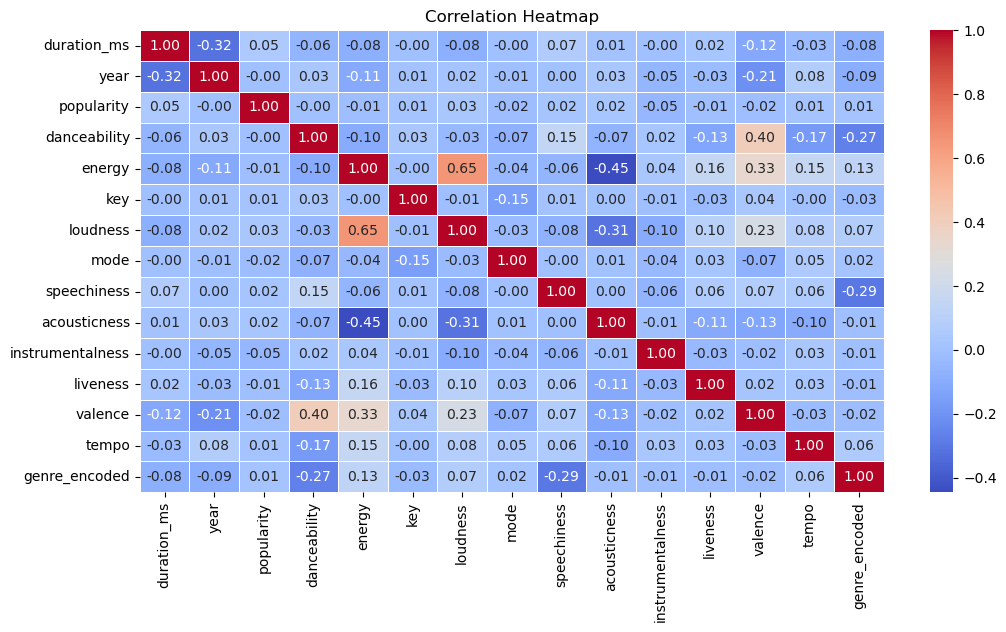

Correlation of 'genre' with other features:
 genre_encoded       1.000000
energy              0.128376
loudness            0.074107
tempo               0.060547
mode                0.015656
popularity          0.013853
acousticness       -0.006256
instrumentalness   -0.010482
liveness           -0.014542
valence            -0.020557
key                -0.029788
duration_ms        -0.082013
year               -0.090308
danceability       -0.268102
speechiness        -0.294834
Name: genre_encoded, dtype: float64


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
data1 = pd.read_csv('songs.csv')

# Drop non-numeric columns except 'genre'
numeric_data = data1.select_dtypes(include=['number']).copy()

if 'genre' in data1.columns:
    le = LabelEncoder()
    data1['genre_encoded'] = le.fit_transform(data1['genre'])
    numeric_data['genre_encoded'] = data1['genre_encoded']

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

print("Correlation of 'genre' with other features:\n", corr_matrix['genre_encoded'].sort_values(ascending=False))


In [8]:
#create dataframe
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [9]:
df2 = df2.sample(n=50000, random_state=42)  # Keep only 1000 random rows
df2.to_csv("reduced_dataset2.csv", index=False)

In [10]:
df1 = df1.drop(columns=['energy', 'loudness', 'tempo', 'mode', 'popularity', 'acousticness', 'instrumentalness', 'liveness', 'key', 'duration_ms',
                       'year', 'danceability', 'speechiness'])

# Data preprocessing

In [12]:
def null_count():
    return pd.DataFrame({'features': df2.columns,
                'dtypes': df2.dtypes.values,
                'NaN count': df2.isnull().sum().values,
                'NaN percentage': df2.isnull().sum().values/df2.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0,int64,0,0.000000
1,text,object,0,0.000000
2,label,int64,0,0.000000


In [13]:
df2.duplicated().sum()

0

In [14]:
df2.columns

Index(['Unnamed: 0', 'text', 'label'], dtype='object')

In [15]:
for column in df2.columns:
    num_distinct_values = len(df2[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0: 50000 distinct values
text: 49635 distinct values
label: 6 distinct values


## Drop columns

In [17]:
df2 = df2.drop(columns=['Unnamed: 0', 'label'])

In [18]:
# text
# convert text to lowercase

In [19]:
df2['Lowercased_Text'] = df2['text'].astype(str).str.lower()
df2.head()

,text,Lowercased_Text
36130,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...
138065,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...
146440,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...
103337,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...
315528,im actually feeling a little smug,im actually feeling a little smug


In [20]:
# handle emoji

In [21]:
pip install demoji

Note: you may need to restart the kernel to use updated packages.


In [22]:
df2['Lowercased_Text'] = df2['Lowercased_Text'].astype('str')

In [23]:
import demoji

df2['rm_emoji'] =  df2['Lowercased_Text'].apply(demoji.replace_with_desc)

print(df2)

                                                     text  \
36130   id say maybe made them feel foolish but that w...   
138065  i joined the lds church i admit to feeling som...   
146440  i must admit i didnt feel like hugging him not...   
103337  i hate that i can still feel if any nerve is d...   
315528                  im actually feeling a little smug   
...                                                   ...   
301432             im feeling fantastic the past few days   
384414  i lie awake on anne s couch or in brooke s gue...   
68559            i was just feeling a little bit creative   
100473  i still feel most comfortable and at ease ther...   
48522                 i may be feeling a little resentful   

                                          Lowercased_Text  \
36130   id say maybe made them feel foolish but that w...   
138065  i joined the lds church i admit to feeling som...   
146440  i must admit i didnt feel like hugging him not...   
103337  i hate that i c

In [24]:
# english shortforms

In [25]:
!pip install contractions

In [26]:
import contractions

short_forms_dict = {
    "2": "too",
    "4": "for",
    "8": "ate",
    "b": "be",
    "c": "see",
    "i": "eye",
    "k": "ok",
    "m": "am",
    "o": "oh",
    "r": "are",
    "t": "tea",
    "u": "you",
    "y": "why",
    "2F4U": "Too Fast For You",
    "4YEO": "For Your Eyes Only",
    "FYEO": "For Your Eyes Only",
    "AAMOF": "As a Matter of Fact",
    "ACK": "Acknowledgment",
    "AFAIK": "As far as I know",
    "AFAIR": "As far as I remember",
    "AFK": "Away from Keyboard",
    "AKA": "Also known as",
    "B2K": "Back to Keyboard",
    "BTK": "Back to Keyboard",
    "BTT": "Back to Topic",
    "BTW": "By the Way",
    "BCS": "Because",
    "C&P": "Copy and Paste",
    "CU": "See you",
    "DIY": "Do it Yourself",
    "EOBD": "End of Business Day",
    "EOD": "End of Discussion",
    "EOM": "End of Message",
    "EOT": "End of Thread",
    "FAQ": "Frequently asked Questions",
    "FACK": "Full Acknowledge",
    "FKA": "Formerly known as",
    "FWIW": "For what it's Worth",
    "FYI": "For your Information",
    "JFYI": "Just For your Information",
    "FTW": "Fuck the World / For the Win",
    "HF": "Have fun",
    "HTH": "Hope this Helps",
    "IDK": "I don't know",
    "IIRC": "If I Recall",
    "IMHO": "In my Humble Opinion",
    "IMO": "In my Opinion",
    "IMNSHO": "In my not so Humble",
    "IOW": "In other Words",
    "ITT": "In this Thread",
    "LOL": "Laughing out loud",
    "DGMW": "Don't get me wrong",
    "MMW": "Mark my Words",
    "N/A": "Not Available",
    "NaN": "Not a Number",
    "NNTR": "No need to Reply",
    "noob": "Newbie",
    "n00b": "Newbie",
    "NOYB": "None of your Business",
    "NRN": "No Reply Necessary",
    "OMG": "Oh my God",
    "omg": "Oh my God",
    "OP": "Original Post",
    "OT": "Off Topic",
    "OTOH": "On the other Hand",
    "PEBKAC": "Problem exists between Keyboard and Chair",
    "pcs": "pieces",
    "POV": "Point of View",
    "ROTFL": "Rolling on the Floor Laughing",
    "RSVP": "Please reply",
    "RTFM": "Read the fine Manual",
    "SCNR": "Sorry, could not Resist",
    "SFLR": "Sorry, for late Reply",
    "SPOC": "Single Point of Contact",
    "TBA": "To be Announced",
    "TBC": "To be Continued",
    "TIA": "Thanks in Advance",
    "TGIF": "Thanks God, its Friday",
    "THX": "Thanks",
    "thx": "Thanks",
    "TNX": "Thanks",
    "TQ": "Thank You",
    "tq": "Thank You",
    "TYVM": "Thank You Very Much",
    "TYT": "Take your Time",
    "TTYL": "Talk to you Later",
    "w00t": "Whoomp, there it is",
    "WFM": "Works for Me",
    "WRT": "With Regard to",
    "WTH": "What the Hell",
    "WTF": "What the Fuck",
    "YMMD": "You made my Day",
    "YMMV": "Your Mileage may vary",
    "YAM": "Yet Another Meeting",
    "ICYMI": "In Case you missed it",
    "2moro": "Tomorrow",
    "2nte": "Tonight",
    "AEAP": "As Early as Possible",
    "ALAP": "As Late as Possible",
    "ASAP": "As Soon as Possible",
    "B3": "Blah, Blah, Blah",
    "B4YKI": "Before You Know it",
    "BAE": "Before Anyone else",
    "BMBAE": "Be My BAE",
    "BFF": "Best Friends, Forever",
    "BM&Y": "Between Me and You",
    "BRB": "Be right Back",
    "BRT": "Be right There",
    "BTAM": "Be that as it May",
    "C-P": "Sleepy",
    "CTN": "Cannot talk now",
    "CUS": "See You Soon",
    "CWOT": "Complete Waste of Time",
    "CYT": "See You Tomorrow",
    "E123": "Easy as 1, 2, 3",
    "EM?": "Excuse Me?",
    "EOD": "End of Day",
    "F2F": "Face to Face",
    "FC": "Fingers Crossed",
    "FOAF": "Friend of a Friend",
    "GR8": "Great",
    "HAK": "Hugs and Kisses",
    "IDC": "I Don't Care",
    "IDK": "I Don't Know",
    "ILU": "I Love You",
    "ILY": "I Love You",
    "IMU": "I Miss You",
    "IRL": "In Real Life",
    "J/K": "Just Kidding",
    "JC": "Just Checking",
    "JTLYK": "Just to Let You Know",
    "KFY": "Kiss for You",
    "KMN": "Kill Me Now",
    "KPC": "Keeping Parents Clueless",
    "L8R": "Later",
    "MoF": "Male or Female",
    "MTFBWY": "May the Force be with You",
    "MYOB": "Mind Your Own Business",
    "N-A-Y-L": "In a While",
    "NAZ": "Name, Address, ZIP",
    "NC": "No Comment",
    "NIMBY": "Not in my Backyard",
    "NM": "Never Mind",
    "NP": "No Problem",
    "NSFW": "Not Safe for Work",
    "NTIM": "Not that it Matters",
    "NVM": "Never Mind",
    "OATUS": "On a totally Unrelated Subject",
    "OIC": "Oh, I See",
    "OMW": "On My Way",
    "OTL": "Out to Lunch",
    "OTP": "One Time password",
    "P911": "Parent Alert",
    "PAL": "Parents are Listening",
    "PAW": "Parents are Watching",
    "PIR": "Parent in Room",
    "POS": "Parent over Shoulder",
    "PROP": "Proper Respect",
    "QT": "Cutie",
    "RN": "Right Now",
    "RU": "Are You",
    "SEP": "Someone else's Problem",
    "SITD": "Still in the Dark",
    "SLAP": "Sounds like a Plan",
    "SMIM": "Send Me an Instant Message",
    "SO": "Significant Other",
    "TMI": "Too Much Information",
    "UR": "Your",
    "W8": "Wait",
    "WB": "Welcome Back",
    "WYCM": "Will You Call Me?",
    "WYWH": "Wish You Were Here",
    "XOXOXOX": "Hugs, Kisses, LOVE",
}

def expand_short_forms(text, short_forms_dict):
    words = text.split()
    expanded_words = [short_forms_dict[word] if word in short_forms_dict else word for word in words]
    return ' '.join(expanded_words)

df2['english_shortform'] = df2['rm_emoji'].apply(lambda x: expand_short_forms(x, short_forms_dict))


# Display the results
print(df2[['english_shortform']])

df2.head()

                                        english_shortform
36130   id say maybe made them feel foolish but that w...
138065  eye joined the lds church eye admit to feeling...
146440  eye must admit eye didnt feel like hugging him...
103337  eye hate that eye can still feel if any nerve ...
315528                  im actually feeling a little smug
...                                                   ...
301432             im feeling fantastic the past few days
384414  eye lie awake on anne s couch or in brooke s g...
68559          eye was just feeling a little bit creative
100473  eye still feel most comfortable and at ease th...
48522               eye may be feeling a little resentful

[50000 rows x 1 columns]


,text,Lowercased_Text,rm_emoji,english_shortform
36130,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...
138065,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,eye joined the lds church eye admit to feeling...
146440,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,eye must admit eye didnt feel like hugging him...
103337,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,eye hate that eye can still feel if any nerve ...
315528,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug


In [27]:
# remove numbers

In [28]:
def remove_digits(text):
    return ''.join(char for char in text if not char.isdigit())

df2['remove_num'] = df2['english_shortform'].apply(remove_digits)
df2.head()

,text,Lowercased_Text,rm_emoji,english_shortform,remove_num
36130,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...
138065,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...
146440,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...
103337,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...
315528,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug


In [29]:
# remove white space

In [30]:
df2['white_space_rm'] = df2['remove_num'].astype(str).str.strip()

df2.head()

,text,Lowercased_Text,rm_emoji,english_shortform,remove_num,white_space_rm
36130,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...
138065,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...
146440,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...
103337,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...
315528,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug


In [31]:
# remove punctuation

In [32]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df2['remove_punctuation'] = df2['white_space_rm'].apply(remove_punctuation)

df2.head()

,text,Lowercased_Text,rm_emoji,english_shortform,remove_num,white_space_rm,remove_punctuation
36130,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...
138065,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...
146440,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...
103337,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...
315528,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug


In [33]:
# tokenization

In [34]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [35]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def concatenate_elements(row):
    if isinstance(row, list): 
        return ' '.join(row)
    return row  

df2['remove_punctuation'] = df2['remove_punctuation'].apply(concatenate_elements)

def tokenize_text(text):
    return word_tokenize(text)

df2['tokenized_text'] = df2['remove_punctuation'].apply(tokenize_text)

df2.head()

[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,text,Lowercased_Text,rm_emoji,english_shortform,remove_num,white_space_rm,remove_punctuation,tokenized_text
36130,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,"[id, say, maybe, made, them, feel, foolish, bu..."
138065,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,"[eye, joined, the, lds, church, eye, admit, to..."
146440,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,"[eye, must, admit, eye, didnt, feel, like, hug..."
103337,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,"[eye, hate, that, eye, can, still, feel, if, a..."
315528,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,"[im, actually, feeling, a, little, smug]"


In [36]:
# stop words

In [37]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [38]:
# remove english stopwords

In [39]:
# Download the NLTK stopwords corpus
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df2['rm_eng_stopwords'] = df2['tokenized_text'].apply(remove_stopwords)

df2.head()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,text,Lowercased_Text,rm_emoji,english_shortform,remove_num,white_space_rm,remove_punctuation,tokenized_text,rm_eng_stopwords
36130,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,"[id, say, maybe, made, them, feel, foolish, bu...","[id, say, maybe, made, feel, foolish, would, r..."
138065,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,"[eye, joined, the, lds, church, eye, admit, to...","[eye, joined, lds, church, eye, admit, feeling..."
146440,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,"[eye, must, admit, eye, didnt, feel, like, hug...","[eye, must, admit, eye, didnt, feel, like, hug..."
103337,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,"[eye, hate, that, eye, can, still, feel, if, a...","[eye, hate, eye, still, feel, nerve, damaged, ..."
315528,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,"[im, actually, feeling, a, little, smug]","[im, actually, feeling, little, smug]"


In [40]:
def concatenate_elements(row):
    return ' '.join(row)

df2['after_rm_stopwords'] = df2['rm_eng_stopwords'].apply(concatenate_elements)

In [41]:
# lemmatization

In [42]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [43]:
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [44]:
df2.head()

,text,Lowercased_Text,rm_emoji,english_shortform,remove_num,white_space_rm,remove_punctuation,tokenized_text,rm_eng_stopwords,after_rm_stopwords
36130,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,"[id, say, maybe, made, them, feel, foolish, bu...","[id, say, maybe, made, feel, foolish, would, r...",id say maybe made feel foolish would reeeeeeal...
138065,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,"[eye, joined, the, lds, church, eye, admit, to...","[eye, joined, lds, church, eye, admit, feeling...",eye joined lds church eye admit feeling somewh...
146440,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,"[eye, must, admit, eye, didnt, feel, like, hug...","[eye, must, admit, eye, didnt, feel, like, hug...",eye must admit eye didnt feel like hugging eye...
103337,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,"[eye, hate, that, eye, can, still, feel, if, a...","[eye, hate, eye, still, feel, nerve, damaged, ...",eye hate eye still feel nerve damaged badly en...
315528,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,"[im, actually, feeling, a, little, smug]","[im, actually, feeling, little, smug]",im actually feeling little smug


In [45]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization to English text
def lemmatize_english_text(text):
    tokens = word_tokenize(text)  # Tokenize text
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in tokens]  
    return ' '.join(lemmatized_words)

df2['lemmatized_english_text'] = df2['after_rm_stopwords'].astype(str).apply(lemmatize_english_text)

df2.head()

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,text,Lowercased_Text,rm_emoji,english_shortform,remove_num,white_space_rm,remove_punctuation,tokenized_text,rm_eng_stopwords,after_rm_stopwords,lemmatized_english_text
36130,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,"[id, say, maybe, made, them, feel, foolish, bu...","[id, say, maybe, made, feel, foolish, would, r...",id say maybe made feel foolish would reeeeeeal...,id say maybe make feel foolish would reeeeeeal...
138065,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,"[eye, joined, the, lds, church, eye, admit, to...","[eye, joined, lds, church, eye, admit, feeling...",eye joined lds church eye admit feeling somewh...,eye join lds church eye admit feel somewhat as...
146440,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,"[eye, must, admit, eye, didnt, feel, like, hug...","[eye, must, admit, eye, didnt, feel, like, hug...",eye must admit eye didnt feel like hugging eye...,eye must admit eye didnt feel like hug eye ang...
103337,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,"[eye, hate, that, eye, can, still, feel, if, a...","[eye, hate, eye, still, feel, nerve, damaged, ...",eye hate eye still feel nerve damaged badly en...,eye hate eye still feel nerve damage badly eno...
315528,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,"[im, actually, feeling, a, little, smug]","[im, actually, feeling, little, smug]",im actually feeling little smug,im actually feel little smug


## VADER

In [47]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    if isinstance(text, str):  # Ensure input is a string
        return sia.polarity_scores(text)
    return {"compound": 0, "pos": 0, "neu": 0, "neg": 0}  # Default for non-text

# Apply VADER to get sentiment scores
df2['sentiment_scores'] = df2['lemmatized_english_text'].apply(get_sentiment_scores)

# Extract individual sentiment scores
df2['compound'] = df2['sentiment_scores'].apply(lambda x: x['compound'])
df2['positive'] = df2['sentiment_scores'].apply(lambda x: x['pos'])
df2['neutral'] = df2['sentiment_scores'].apply(lambda x: x['neu'])
df2['negative'] = df2['sentiment_scores'].apply(lambda x: x['neg'])

# Function to classify sentiment labels
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df2['sentiment_label'] = df2['compound'].apply(classify_sentiment)

df2[['lemmatized_english_text', 'compound', 'positive', 'neutral', 'negative', 'sentiment_label']].head()


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,lemmatized_english_text,compound,positive,neutral,negative,sentiment_label
36130,id say maybe make feel foolish would reeeeeeal...,-0.2500,0.108,0.686,0.206,Negative
138065,eye join lds church eye admit feel somewhat as...,0.5563,0.349,0.519,0.132,Positive
146440,eye must admit eye didnt feel like hug eye ang...,-0.7693,0.173,0.432,0.395,Negative
103337,eye hate eye still feel nerve damage badly eno...,-0.9559,0.000,0.411,0.589,Negative
315528,im actually feel little smug,0.1298,0.274,0.726,0.000,Positive


In [48]:
df2.head()

,text,Lowercased_Text,rm_emoji,english_shortform,remove_num,white_space_rm,remove_punctuation,tokenized_text,rm_eng_stopwords,after_rm_stopwords,lemmatized_english_text,sentiment_scores,compound,positive,neutral,negative,sentiment_label
36130,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,"[id, say, maybe, made, them, feel, foolish, bu...","[id, say, maybe, made, feel, foolish, would, r...",id say maybe made feel foolish would reeeeeeal...,id say maybe make feel foolish would reeeeeeal...,"{'neg': 0.206, 'neu': 0.686, 'pos': 0.108, 'co...",-0.2500,0.108,0.686,0.206,Negative
138065,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,"[eye, joined, the, lds, church, eye, admit, to...","[eye, joined, lds, church, eye, admit, feeling...",eye joined lds church eye admit feeling somewh...,eye join lds church eye admit feel somewhat as...,"{'neg': 0.132, 'neu': 0.519, 'pos': 0.349, 'co...",0.5563,0.349,0.519,0.132,Positive
146440,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,"[eye, must, admit, eye, didnt, feel, like, hug...","[eye, must, admit, eye, didnt, feel, like, hug...",eye must admit eye didnt feel like hugging eye...,eye must admit eye didnt feel like hug eye ang...,"{'neg': 0.395, 'neu': 0.432, 'pos': 0.173, 'co...",-0.7693,0.173,0.432,0.395,Negative
103337,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,"[eye, hate, that, eye, can, still, feel, if, a...","[eye, hate, eye, still, feel, nerve, damaged, ...",eye hate eye still feel nerve damaged badly en...,eye hate eye still feel nerve damage badly eno...,"{'neg': 0.589, 'neu': 0.411, 'pos': 0.0, 'comp...",-0.9559,0.000,0.411,0.589,Negative
315528,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,"[im, actually, feeling, a, little, smug]","[im, actually, feeling, little, smug]",im actually feeling little smug,im actually feel little smug,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",0.1298,0.274,0.726,0.000,Positive


In [49]:
print(df2.columns)

Index(['text', 'Lowercased_Text', 'rm_emoji', 'english_shortform',
       'remove_num', 'white_space_rm', 'remove_punctuation', 'tokenized_text',
       'rm_eng_stopwords', 'after_rm_stopwords', 'lemmatized_english_text',
       'sentiment_scores', 'compound', 'positive', 'neutral', 'negative',
       'sentiment_label'],
      dtype='object')


In [50]:
df2.head()

,text,Lowercased_Text,rm_emoji,english_shortform,remove_num,white_space_rm,remove_punctuation,tokenized_text,rm_eng_stopwords,after_rm_stopwords,lemmatized_english_text,sentiment_scores,compound,positive,neutral,negative,sentiment_label
36130,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,id say maybe made them feel foolish but that w...,"[id, say, maybe, made, them, feel, foolish, bu...","[id, say, maybe, made, feel, foolish, would, r...",id say maybe made feel foolish would reeeeeeal...,id say maybe make feel foolish would reeeeeeal...,"{'neg': 0.206, 'neu': 0.686, 'pos': 0.108, 'co...",-0.2500,0.108,0.686,0.206,Negative
138065,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,i joined the lds church i admit to feeling som...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,eye joined the lds church eye admit to feeling...,"[eye, joined, the, lds, church, eye, admit, to...","[eye, joined, lds, church, eye, admit, feeling...",eye joined lds church eye admit feeling somewh...,eye join lds church eye admit feel somewhat as...,"{'neg': 0.132, 'neu': 0.519, 'pos': 0.349, 'co...",0.5563,0.349,0.519,0.132,Positive
146440,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,i must admit i didnt feel like hugging him not...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,eye must admit eye didnt feel like hugging him...,"[eye, must, admit, eye, didnt, feel, like, hug...","[eye, must, admit, eye, didnt, feel, like, hug...",eye must admit eye didnt feel like hugging eye...,eye must admit eye didnt feel like hug eye ang...,"{'neg': 0.395, 'neu': 0.432, 'pos': 0.173, 'co...",-0.7693,0.173,0.432,0.395,Negative
103337,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,i hate that i can still feel if any nerve is d...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,eye hate that eye can still feel if any nerve ...,"[eye, hate, that, eye, can, still, feel, if, a...","[eye, hate, eye, still, feel, nerve, damaged, ...",eye hate eye still feel nerve damaged badly en...,eye hate eye still feel nerve damage badly eno...,"{'neg': 0.589, 'neu': 0.411, 'pos': 0.0, 'comp...",-0.9559,0.000,0.411,0.589,Negative
315528,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,im actually feeling a little smug,"[im, actually, feeling, a, little, smug]","[im, actually, feeling, little, smug]",im actually feeling little smug,im actually feel little smug,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",0.1298,0.274,0.726,0.000,Positive


In [51]:
from collections import Counter
genre_counts_before = Counter([g.strip() for genres in df1["genre"] for g in genres.split(", ")])
print("Before LDA - Genre Counts:", genre_counts_before)


Before LDA - Genre Counts: Counter({'pop': 1633, 'hip hop': 778, 'R&B': 452, 'Dance/Electronic': 390, 'rock': 234, 'metal': 66, 'latin': 64, 'set()': 22, 'country': 21, 'Folk/Acoustic': 20, 'World/Traditional': 10, 'easy listening': 7, 'blues': 4, 'jazz': 2, 'classical': 1})


# LDA

## preprocess captions

In [54]:
from gensim import corpora, models

# Convert lemmatized text into a list of words
df2["tokens"] = df2["lemmatized_english_text"].apply(lambda x: x.split())

# Create a dictionary and BoW corpus
dictionary_captions = corpora.Dictionary(df2["tokens"])
bow_corpus_captions = [dictionary_captions.doc2bow(text) for text in df2["tokens"]]

# Train LDA Model for Captions
num_topics = 5  
lda_model_captions = models.LdaModel(
    bow_corpus_captions, num_topics=num_topics, id2word=dictionary_captions, passes=10, random_state=42
)

# Assign Dominant Topic to Each Caption
df2["dominant_topic"] = [max(lda_model_captions[bow], key=lambda x: x[1])[0] for bow in bow_corpus_captions]


## preprocess songs

In [56]:
# Convert 'genre' column into a list of words
df1["genre_tokens"] = df1["genre"].astype(str).apply(lambda x: x.split(", "))  # <-- FIXED

# Create dictionary and BoW corpus for df1
dictionary_songs = corpora.Dictionary(df1["genre_tokens"])
bow_corpus_songs = [dictionary_songs.doc2bow(text) for text in df1["genre_tokens"]]

# Train LDA Model for Songs
lda_model_songs = models.LdaModel(
    bow_corpus_songs, num_topics=num_topics, id2word=dictionary_songs, passes=10, random_state=42
)

# Assign Dominant Topic to Each Song
df1["dominant_topic"] = [max(lda_model_songs[bow], key=lambda x: x[1])[0] for bow in bow_corpus_songs]



In [57]:
genre_counts_after = Counter(df1["dominant_topic"])  # Count topics assigned by LDA
print("After LDA - Topic Counts:", genre_counts_after)


After LDA - Topic Counts: Counter({3: 821, 0: 444, 1: 444, 4: 269, 2: 22})


## check topics found by LDA

In [59]:
print("\nTopics for Captions:")
for topic_id, topic_words in lda_model_captions.print_topics(num_topics=num_topics):
    print(f"Topic {topic_id}: {topic_words}")

print("\nTopics for Songs:")
for topic_id, topic_words in lda_model_songs.print_topics(num_topics=num_topics):
    print(f"Topic {topic_id}: {topic_words}")




Topics for Captions:
Topic 0: 0.167*"eye" + 0.099*"feel" + 0.023*"like" + 0.011*"make" + 0.009*"love" + 0.008*"get" + 0.008*"know" + 0.007*"really" + 0.007*"people" + 0.007*"tea"
Topic 1: 0.176*"eye" + 0.091*"feel" + 0.021*"like" + 0.011*"know" + 0.010*"want" + 0.009*"make" + 0.009*"tea" + 0.009*"think" + 0.008*"go" + 0.007*"get"
Topic 2: 0.139*"eye" + 0.102*"feel" + 0.011*"bite" + 0.011*"little" + 0.010*"get" + 0.010*"ive" + 0.009*"go" + 0.009*"like" + 0.009*"time" + 0.009*"start"
Topic 3: 0.021*"http" + 0.018*"href" + 0.011*"feel" + 0.010*"amp" + 0.010*"hot" + 0.010*"free" + 0.009*"class" + 0.008*"confuse" + 0.008*"www" + 0.007*"lucky"
Topic 4: 0.138*"im" + 0.110*"feel" + 0.054*"eye" + 0.018*"today" + 0.010*"ill" + 0.010*"sad" + 0.009*"pretty" + 0.009*"little" + 0.009*"really" + 0.008*"sure"

Topics for Songs:
Topic 0: 0.396*"R&B" + 0.378*"pop" + 0.223*"hip hop" + 0.001*"Dance/Electronic" + 0.000*"rock" + 0.000*"World/Traditional" + 0.000*"Folk/Acoustic" + 0.000*"metal" + 0.000*"eas

In [60]:
df1.head()

,artist,song,explicit,valence,genre,genre_encoded,genre_tokens,dominant_topic
0,Britney Spears,Oops!...I Did It Again,False,0.894,pop,30,[pop],3
1,blink-182,All The Small Things,False,0.684,"rock, pop",54,"[rock, pop]",4
2,Faith Hill,Breathe,False,0.278,"pop, country",36,"[pop, country]",4
3,Bon Jovi,It's My Life,False,0.544,"rock, metal",53,"[rock, metal]",4
4,*NSYNC,Bye Bye Bye,False,0.879,pop,30,[pop],3


In [61]:
# Function to classify sentiment based on valence score
def classify_song_sentiment(valence):
    if valence >= 0.6:
        return "Positive"
    elif valence <= 0.4:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment classification to df1
df1["sentiment_label"] = df1["valence"].apply(classify_song_sentiment)

print("Assigned sentiment labels to songs based on valence.")


Assigned sentiment labels to songs based on valence.


In [62]:
unique_genres = set()
df1["genre"].dropna().apply(lambda x: unique_genres.update(x.split(", ")))

print(f"Total unique genres: {len(unique_genres)}")
print("Sample genres:", list(unique_genres)[:20])  # Show first 20 unique genres


Total unique genres: 15
Sample genres: ['country', 'metal', 'latin', 'blues', 'jazz', 'classical', 'easy listening', 'Dance/Electronic', 'World/Traditional', 'R&B', 'pop', 'Folk/Acoustic', 'set()', 'hip hop', 'rock']


In [63]:
from collections import Counter

genre_counts = Counter(df1["genre"].astype(str).str.split(", ").sum())

print("Genre Counts:", genre_counts)



Genre Counts: Counter({'pop': 1633, 'hip hop': 778, 'R&B': 452, 'Dance/Electronic': 390, 'rock': 234, 'metal': 66, 'latin': 64, 'set()': 22, 'country': 21, 'Folk/Acoustic': 20, 'World/Traditional': 10, 'easy listening': 7, 'blues': 4, 'jazz': 2, 'classical': 1})


In [64]:
df1_filtered = df1[["song", "artist", "genre", "dominant_topic", "sentiment_label"]]
df2_filtered = df2[["lemmatized_english_text", "dominant_topic","sentiment_label"]]

# Convert genre into lists (handling multiple genres per song)
df1_filtered["genre_list"] = df1_filtered["genre"].astype(str).apply(lambda x: x.split(", "))

print("df1 columns:", df1_filtered.columns.tolist())  
print("df2 columns:", df2_filtered.columns.tolist())  


df1 columns: ['song', 'artist', 'genre', 'dominant_topic', 'sentiment_label', 'genre_list']
df2 columns: ['lemmatized_english_text', 'dominant_topic', 'sentiment_label']


C:\Users\huixing\AppData\Local\Temp\ipykernel_29352\1412667961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered["genre_list"] = df1_filtered["genre"].astype(str).apply(lambda x: x.split(", "))


## multi-label

In [66]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert genre string to list
df1_filtered["genre_list"] = df1_filtered["genre"].astype(str).apply(lambda x: x.split(", "))

print(df1_filtered["genre_list"].head())


0             [pop]
1       [rock, pop]
2    [pop, country]
3     [rock, metal]
4             [pop]
Name: genre_list, dtype: object


C:\Users\huixing\AppData\Local\Temp\ipykernel_29352\2051030396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered["genre_list"] = df1_filtered["genre"].astype(str).apply(lambda x: x.split(", "))


In [67]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform genre column
genre_encoded = mlb.fit_transform(df1_filtered["genre_list"])

# Convert back to DataFrame
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

print(genre_df.head())


   Dance/Electronic  Folk/Acoustic  R&B  World/Traditional  blues  classical  \
0                 0              0    0                  0      0          0   
1                 0              0    0                  0      0          0   
2                 0              0    0                  0      0          0   
3                 0              0    0                  0      0          0   
4                 0              0    0                  0      0          0   

   country  easy listening  hip hop  jazz  latin  metal  pop  rock  set()  
0        0               0        0     0      0      0    1     0      0  
1        0               0        0     0      0      0    1     1      0  
2        1               0        0     0      0      0    1     0      0  
3        0               0        0     0      0      1    0     1      0  
4        0               0        0     0      0      0    1     0      0  


In [68]:
# Drop the original genre column if not needed
df1_final = df1_filtered.drop(columns=["genre", "genre_list"]).reset_index(drop=True)

# Concatenate one-hot encoded genre data
df1_final = pd.concat([df1_final, genre_df], axis=1)

print("Final df1 shape:", df1_final.shape)
print(df1_final.head())


Final df1 shape: (2000, 19)
                     song          artist  dominant_topic sentiment_label  \
0  Oops!...I Did It Again  Britney Spears               3        Positive   
1    All The Small Things       blink-182               4        Positive   
2                 Breathe      Faith Hill               4        Negative   
3            It's My Life        Bon Jovi               4         Neutral   
4             Bye Bye Bye          *NSYNC               3        Positive   

   Dance/Electronic  Folk/Acoustic  R&B  World/Traditional  blues  classical  \
0                 0              0    0                  0      0          0   
1                 0              0    0                  0      0          0   
2                 0              0    0                  0      0          0   
3                 0              0    0                  0      0          0   
4                 0              0    0                  0      0          0   

   country  easy listening  

In [69]:
print("df2_filtered columns:", df2_filtered.columns.tolist())
print("df1_final columns:", df1_final.columns.tolist())


df2_filtered columns: ['lemmatized_english_text', 'dominant_topic', 'sentiment_label']
df1_final columns: ['song', 'artist', 'dominant_topic', 'sentiment_label', 'Dance/Electronic', 'Folk/Acoustic', 'R&B', 'World/Traditional', 'blues', 'classical', 'country', 'easy listening', 'hip hop', 'jazz', 'latin', 'metal', 'pop', 'rock', 'set()']


In [70]:
print("Genres in df1_final before merging:")
print(df1_final.iloc[:, 3:].sum())  # Sum genre columns to count songs per genre


Genres in df1_final before merging:
sentiment_label      PositivePositiveNegativeNeutralPositivePositiv...
Dance/Electronic                                                   390
Folk/Acoustic                                                       20
R&B                                                                452
World/Traditional                                                   10
blues                                                                4
classical                                                            1
country                                                             21
easy listening                                                       7
hip hop                                                            778
jazz                                                                 2
latin                                                               64
metal                                                               66
pop                                      

In [71]:
print("df2_filtered shape:", df2_filtered.shape)
print("df1_final shape:", df1_final.shape)

df2_filtered shape: (50000, 3)
df1_final shape: (2000, 19)


In [72]:
# Rename sentiment labels for clarity
df2_filtered = df2_filtered.rename(columns={"sentiment_label": "sentiment_label_caption"})
df1_final = df1_final.rename(columns={"sentiment_label": "sentiment_label_song"})

# Ensure sentiment labels are lowercase and stripped of extra spaces before merging
df2_filtered["sentiment_label_caption"] = df2_filtered["sentiment_label_caption"].str.strip().str.lower()
df1_final["sentiment_label_song"] = df1_final["sentiment_label_song"].str.strip().str.lower()


In [73]:
df_matched = df2_filtered.merge(df1_final, 
                                left_on="sentiment_label_caption", 
                                right_on="sentiment_label_song", 
                                how="inner")


In [74]:
print("df_matched shape after merging:", df_matched.shape)
print("Columns after merge:", df_matched.columns.tolist())

df_matched shape after merging: (35614971, 22)
Columns after merge: ['lemmatized_english_text', 'dominant_topic_x', 'sentiment_label_caption', 'song', 'artist', 'dominant_topic_y', 'sentiment_label_song', 'Dance/Electronic', 'Folk/Acoustic', 'R&B', 'World/Traditional', 'blues', 'classical', 'country', 'easy listening', 'hip hop', 'jazz', 'latin', 'metal', 'pop', 'rock', 'set()']


In [75]:
common_labels = set(df1_final["sentiment_label_song"]) & set(df2_filtered["sentiment_label_caption"])
print(f"Common sentiment labels: {common_labels}")
print(f"Number of common labels: {len(common_labels)}")


Common sentiment labels: {'neutral', 'negative', 'positive'}
Number of common labels: 3


In [76]:
# Keep only rows where sentiment matches
df_matched = df_matched[df_matched["sentiment_label_caption"] == df_matched["sentiment_label_song"]]

df_matched = df_matched.groupby("lemmatized_english_text").apply(lambda x: x.sample(n=min(len(x), 10), random_state=42)).reset_index(drop=True)

# Rename columns for clarity
df_matched.rename(columns={"sentiment_label_caption": "caption_sentiment", "sentiment_label_song": "song_sentiment"}, inplace=True)

print("Final df_matched columns:", df_matched.columns.tolist())  
df_matched.head(40)


C:\Users\huixing\AppData\Local\Temp\ipykernel_29352\2401859147.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_matched = df_matched.groupby("lemmatized_english_text").apply(lambda x: x.sample(n=min(len(x), 10), random_state=42)).reset_index(drop=True)


Final df_matched columns: ['lemmatized_english_text', 'dominant_topic_x', 'caption_sentiment', 'song', 'artist', 'dominant_topic_y', 'song_sentiment', 'Dance/Electronic', 'Folk/Acoustic', 'R&B', 'World/Traditional', 'blues', 'classical', 'country', 'easy listening', 'hip hop', 'jazz', 'latin', 'metal', 'pop', 'rock', 'set()']


,lemmatized_english_text,dominant_topic_x,caption_sentiment,song,artist,dominant_topic_y,song_sentiment,Dance/Electronic,Folk/Acoustic,R&B,...,classical,country,easy listening,hip hop,jazz,latin,metal,pop,rock,set()
0,,0,neutral,Buzzin Remix,Mann,1,neutral,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,,0,neutral,Halo,Beyoncé,0,neutral,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,,0,neutral,I Hate This Part,The Pussycat Dolls,0,neutral,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,,0,neutral,Touch It,Busta Rhymes,1,neutral,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,,0,neutral,Someone You Loved,Lewis Capaldi,3,neutral,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,,0,neutral,Bodak Yellow,Cardi B,1,neutral,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,,0,neutral,We Fly High,Jim Jones,1,neutral,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7,,0,neutral,Love at First Sight,Kylie Minogue,3,neutral,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,,0,neutral,Put Your Hands Up for Detroit - Radio Edit,Fedde Le Grand,3,neutral,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,,0,neutral,Die Another Day,Madonna,3,neutral,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Train test split

In [78]:
print("Before removing duplicates:", df_matched.shape)
print("Number of unique captions:", df_matched["lemmatized_english_text"].nunique())


Before removing duplicates: (489550, 22)
Number of unique captions: 48955


In [79]:
X = df_matched["lemmatized_english_text"].values 
y = df_matched.iloc[:, 7:].values 

print("Shape of y:", y.shape)
print("First few rows of y:\n", y[:5])


Shape of y: (489550, 15)
First few rows of y:
 [[0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


In [80]:
print(X)

['' '' '' ...
 'younger brother destroy give away book eye intend keep long possible'
 'younger brother destroy give away book eye intend keep long possible'
 'younger brother destroy give away book eye intend keep long possible']


In [81]:
print(y)

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]]


In [82]:
print("Shape of X:", X.shape)  # Should match y
print("Shape of y:", y.shape)  # Must be same as X
print("Length of df_matched:", len(df_matched))  # Should match X and y


Shape of X: (489550,)
Shape of y: (489550, 15)
Length of df_matched: 489550


In [83]:
print("Unique lemmatized_english_text count:", df_matched["lemmatized_english_text"].nunique())
print("Total rows in df_matched:", len(df_matched))
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Unique lemmatized_english_text count: 48955
Total rows in df_matched: 489550
Shape of X: (489550,)
Shape of y: (489550, 15)


In [84]:
# Perform the train-test split (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
print(X.shape,X_train.shape,X_test.shape)

(489550,) (391640,) (97910,)


In [86]:
print(X_train)

['eye feel fond adopt home'
 'eye happy eye get every detail right magically eye would become hallmark commercial eye saw year us grocery store commercial make family feel less perfect'
 'eye prefer marvel dc film direct man steel write eye personally feel insult writers without even see movie yet'
 ... 'eye feel inhibit embarrass eye really eye mean'
 'eye feel like eye break fourth wall something'
 'eye feel help create rich texture touch mystery outfit']


## TF-IDF

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure genre columns are correctly selected
genre_columns = df_matched.columns[7:]  # Ensure these are only the genre labels
y = df_matched[genre_columns]  # Multi-label genre encoding (already binary)

# Apply train-test split correctly
X_train, X_test, y_train, y_test = train_test_split(
    df_matched["lemmatized_english_text"],  
    y,  # Use the multi-label binarized labels
    test_size=0.2,  
    random_state=42,
)

# TF-IDF Transformation
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  
    min_df=5,  
    max_df=0.5,  
    ngram_range=(1, 2),  
    sublinear_tf=True,  
    stop_words='english',
    dtype=np.float32  
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert y_train and y_test to NumPy arrays
y_train_binarized = y_train.values  
y_test_binarized = y_test.values  

# Debug check
print("After Fix:")
print("X_train shape:", X_train_tfidf.shape)
print("y_train shape:", y_train_binarized.shape)
assert X_train_tfidf.shape[0] == y_train_binarized.shape[0], "Mismatch still exists!"



After Fix:
X_train shape: (391640, 1000)
y_train shape: (391640, 15)


In [89]:
# Count the number of samples per genre
genre_counts = y_train_binarized.sum(axis=0)

# Set threshold 
min_samples = 20
valid_genres = np.where(genre_counts >= min_samples)[0]

# Keep only rows that have at least one valid genre
rows_to_keep = y_train_binarized[:, valid_genres].sum(axis=1) > 0
X_train_filtered = X_train_tfidf[rows_to_keep]
y_train_filtered = y_train_binarized[rows_to_keep][:, valid_genres]

# Apply the same column filtering to y_test
y_test_filtered = y_test_binarized[:, valid_genres]

# Apply the same row filtering to X_test
rows_to_keep_test = y_test_filtered.sum(axis=1) > 0  # Keep rows with at least one valid genre
X_test_filtered = X_test_tfidf[rows_to_keep_test]
y_test_filtered = y_test_filtered[rows_to_keep_test]

print("Filtered X_test shape:", X_test_filtered.shape)
print("Filtered y_test shape:", y_test_filtered.shape)


print("Filtered X_train shape:", X_train_filtered.shape)
print("Filtered y_train shape:", y_train_filtered.shape)
print("Remaining genres:", valid_genres)


Filtered X_test shape: (97908, 1000)
Filtered y_test shape: (97908, 9)
Filtered X_train shape: (391633, 1000)
Filtered y_train shape: (391633, 9)
Remaining genres: [ 0  1  2  3  8 10 11 12 13]


In [90]:
print("X_train_tfidf shape:", X_train_filtered.shape)
print("y_train_binarized shape:", y_train_filtered.shape)
assert X_train_filtered.shape[0] == y_train_filtered.shape[0], "Mismatch in number of samples!"


X_train_tfidf shape: (391633, 1000)
y_train_binarized shape: (391633, 9)


In [91]:
genre_distribution = y_train_filtered.sum(axis=0) 
print("Class distribution in training set:\n", genre_distribution)


Class distribution in training set:
 [ 88371     40  89072    233 104124  20158  32531 331348  71384]


# Convert textual data to numerical

In [93]:
print(X_train_filtered)

  (0, 451)	0.808407187461853
  (0, 521)	0.5886237025260925
  (1, 498)	0.27455973625183105
  (1, 777)	0.2524428069591522
  (1, 788)	0.3560106158256531
  (1, 994)	0.29167693853378296
  (1, 633)	0.1928788274526596
  (1, 300)	0.29457104206085205
  (1, 703)	0.3256951570510864
  (1, 232)	0.37651628255844116
  (1, 499)	0.3689231276512146
  (1, 263)	0.3756994903087616
  (2, 443)	0.4409499764442444
  (2, 635)	0.39705032110214233
  (2, 990)	0.31314483284950256
  (2, 565)	0.4189907908439636
  (2, 660)	0.4293222427368164
  (2, 991)	0.43587106466293335
  (3, 114)	0.3626280426979065
  (3, 559)	0.3371136784553528
  (3, 481)	0.34367695450782776
  (3, 52)	0.31127673387527466
  (3, 459)	0.31358763575553894
  (3, 999)	0.35081925988197327
  (3, 762)	0.33621805906295776
  :	:
  (391627, 266)	0.40527042746543884
  (391627, 497)	0.3154207766056061
  (391627, 491)	0.35151124000549316
  (391627, 348)	0.3808598220348358
  (391628, 30)	0.5712371468544006
  (391628, 758)	0.5864092707633972
  (391628, 735)	0.57429

In [94]:
print(X_test_tfidf)

  (0, 91)	0.46312230825424194
  (0, 337)	0.30472174286842346
  (0, 714)	0.4549568295478821
  (0, 862)	0.6969050765037537
  (1, 337)	0.5130142569541931
  (1, 789)	0.5167540907859802
  (1, 790)	0.6854061484336853
  (2, 61)	0.3852040767669678
  (2, 192)	0.3834095001220703
  (2, 258)	0.42799103260040283
  (2, 700)	0.27938488125801086
  (2, 746)	0.35248324275016785
  (2, 858)	0.43393442034721375
  (2, 872)	0.3617170453071594
  (3, 39)	0.46596434712409973
  (3, 371)	0.26968687772750854
  (3, 584)	0.5541825294494629
  (3, 606)	0.24068982899188995
  (3, 947)	0.5874490141868591
  (4, 69)	0.3469538986682892
  (4, 108)	0.42683425545692444
  (4, 371)	0.18627944588661194
  (4, 458)	0.3640015721321106
  (4, 550)	0.18128900229930878
  (4, 574)	0.25958430767059326
  :	:
  (97905, 550)	0.16418379545211792
  (97905, 551)	0.20993201434612274
  (97905, 558)	0.35946932435035706
  (97905, 664)	0.24246107041835785
  (97905, 982)	0.24872031807899475
  (97905, 983)	0.36428025364875793
  (97906, 415)	0.75272780

# Train model

## Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

X_test_filtered = X_test_filtered  

lr_model = OneVsRestClassifier(LogisticRegression(
    C=1.0,
    solver='saga',
    max_iter=200,
    n_jobs=-1,
    random_state=42
))

lr_model.fit(X_train_filtered, y_train_filtered)

lr_train_pred = lr_model.predict(X_train_filtered)
lr_test_pred = lr_model.predict(X_test_filtered)

if y_test_filtered.shape == lr_test_pred.shape:
    train_hamming_loss = hamming_loss(y_train_filtered, lr_train_pred)
    test_hamming_loss = hamming_loss(y_test_filtered, lr_test_pred)  

    print(f"LogisticRegression - Training Hamming Loss: {train_hamming_loss:.4f}")
    print(f"LogisticRegression - Test Hamming Loss: {test_hamming_loss:.4f}")
else:
    print("Error: Shape mismatch! Check dataset processing steps.")

lr_precision = precision_score(y_test_filtered, lr_test_pred, average='micro', zero_division=0)
lr_recall = recall_score(y_test_filtered, lr_test_pred, average='micro', zero_division=0)
lr_f1 = f1_score(y_test_filtered, lr_test_pred, average='micro', zero_division=0)

print(f"LogisticRegression - Precision Score: {lr_precision:.4f}")
print(f"LogisticRegression - Recall Score: {lr_recall:.4f}")
print(f"LogisticRegression - F1 Score: {lr_f1:.4f}")


LogisticRegression - Training Hamming Loss: 0.1327
LogisticRegression - Test Hamming Loss: 0.1333
LogisticRegression - Precision Score: 0.8355
LogisticRegression - Recall Score: 0.4529
LogisticRegression - F1 Score: 0.5874


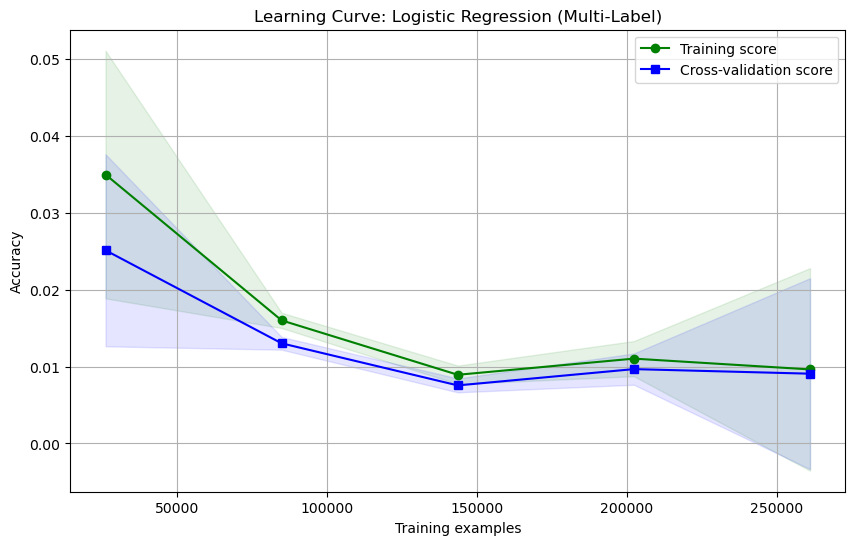

In [98]:
from sklearn.model_selection import learning_curve

lr_model = OneVsRestClassifier(LogisticRegression(
    C=1.0,
    solver='saga',
    max_iter=200,
    n_jobs=-1,
    class_weight='balanced',
    random_state=42
))

plt.figure(figsize=(10, 6))

train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_train_filtered, y_train_filtered, cv=3, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5),  
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='blue')
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training score')
plt.plot(train_sizes, test_mean, 's-', color='blue', label='Cross-validation score')

plt.title('Learning Curve: Logistic Regression (Multi-Label)')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

C:\Users\huixing\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\huixing\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\huixing\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\huixing\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


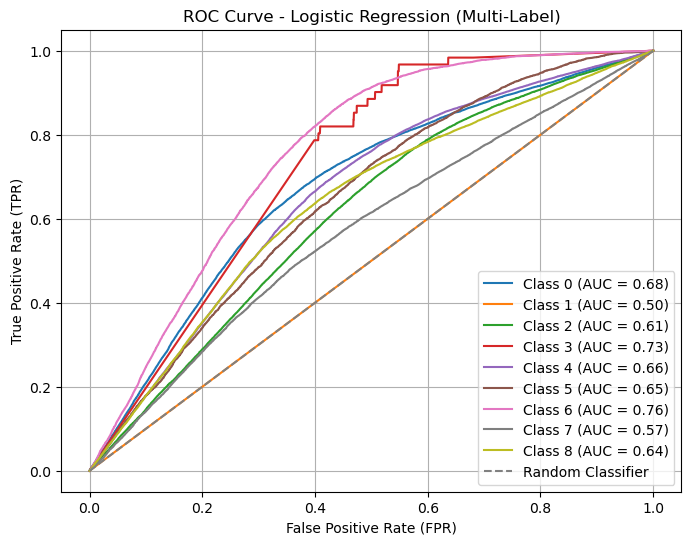

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

lr_model.fit(X_train_filtered, y_train_filtered) 

if not hasattr(lr_model, "estimators_"):
    raise ValueError("Error: The model is not fitted! Run `lr_model.fit(X_train_filtered, y_train_filtered)` first.")

n_classes = y_test_filtered.shape[1]

y_score = lr_model.predict_proba(X_test_filtered)

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_filtered[:, i], y_score[:, i])  
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression (Multi-Label)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




## Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))

rf_model.fit(X_train_filtered, y_train_filtered)

rf_train_pred = rf_model.predict(X_train_filtered)
rf_test_pred = rf_model.predict(X_test_filtered)

train_hamming_loss = hamming_loss(y_train_filtered, rf_train_pred)
test_hamming_loss = hamming_loss(y_test_filtered, rf_test_pred)

print(f"RandomForest - Training Hamming Loss: {train_hamming_loss:.4f}")
print(f"RandomForest - Test Hamming Loss: {test_hamming_loss:.4f}")

rf_precision = precision_score(y_test_filtered, rf_test_pred, average='micro', zero_division=0)
rf_recall = recall_score(y_test_filtered, rf_test_pred, average='micro', zero_division=0)
rf_f1 = f1_score(y_test_filtered, rf_test_pred, average='micro', zero_division=0)

print(f"RandomForest - Precision Score: {rf_precision:.4f}")
print(f"RandomForest - Recall Score: {rf_recall:.4f}")
print(f"RandomForest - F1 Score: {rf_f1:.4f}")


RandomForest - Training Hamming Loss: 0.1310
RandomForest - Test Hamming Loss: 0.1497
RandomForest - Precision Score: 0.7261
RandomForest - Recall Score: 0.4586
RandomForest - F1 Score: 0.5622


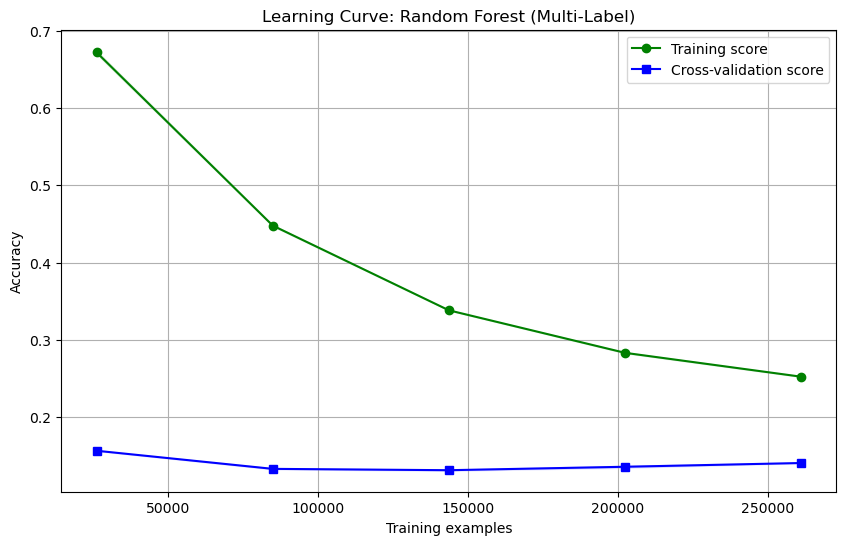

In [102]:
# LEARNING CURVE FOR RANDOM FOREST
rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=10, warm_start=True, random_state=42, n_jobs=-1))

plt.figure(figsize=(10, 6))

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_filtered, y_train_filtered, cv=3, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='blue')
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training score')
plt.plot(train_sizes, test_mean, 's-', color='blue', label='Cross-validation score')

plt.title('Learning Curve: Random Forest (Multi-Label)')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

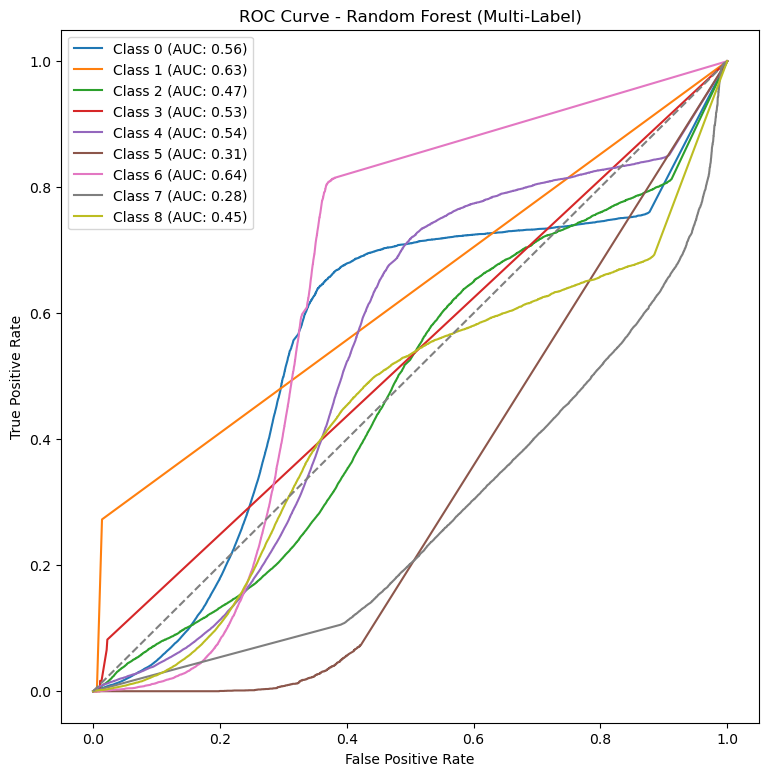

In [103]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

rf_model.fit(X_train_filtered, y_train_filtered)

y_score_rf = rf_model.predict_proba(X_test_filtered)

n_classes = y_test_filtered.shape[1]

plt.figure(figsize=(9, 9))
for idx in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_filtered[:, idx], y_score_rf[:, idx])
    plt.plot(fpr, tpr, label=f'Class {idx} (AUC: {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Multi-Label)")
plt.legend()
plt.show()


## Neural Network

In [105]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

mlp_model = OneVsRestClassifier(MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    max_iter=300,
    learning_rate_init=0.001,
    random_state=42,
    solver="adam",
    early_stopping=True
))

mlp_model.fit(X_train_scaled, y_train_filtered)

mlp_train_pred = mlp_model.predict(X_train_scaled)
mlp_test_pred = mlp_model.predict(X_test_scaled)

train_hamming_loss = hamming_loss(y_train_filtered, mlp_train_pred)
test_hamming_loss = hamming_loss(y_test_filtered, mlp_test_pred)

print(f"Neural Network (MLP) - Training Hamming Loss: {train_hamming_loss:.4f}")
print(f"Neural Network (MLP) - Test Hamming Loss: {test_hamming_loss:.4f}")

mlp_precision = precision_score(y_test_filtered, mlp_test_pred, average='micro', zero_division=0)
mlp_recall = recall_score(y_test_filtered, mlp_test_pred, average='micro', zero_division=0)
mlp_f1 = f1_score(y_test_filtered, mlp_test_pred, average='micro', zero_division=0)

print(f"Neural Network (MLP) - Precision Score: {mlp_precision:.4f}")
print(f"Neural Network (MLP) - Recall Score: {mlp_recall:.4f}")
print(f"Neural Network (MLP) - F1 Score: {mlp_f1:.4f}")




Neural Network (MLP) - Training Hamming Loss: 0.1323
Neural Network (MLP) - Test Hamming Loss: 0.1327
Neural Network (MLP) - Precision Score: 0.8455
Neural Network (MLP) - Recall Score: 0.4484
Neural Network (MLP) - F1 Score: 0.5860


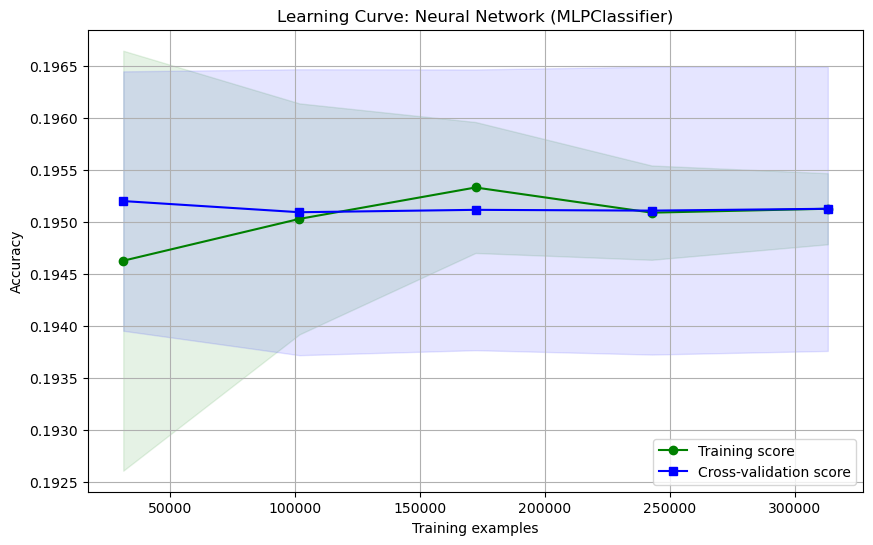

In [106]:
# Learning Curve for Neural Network
plt.figure(figsize=(10, 6))

train_sizes, train_scores, test_scores = learning_curve(
    mlp_model, X_train_scaled, y_train_filtered, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy'
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='blue')
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training score')
plt.plot(train_sizes, test_mean, 's-', color='blue', label='Cross-validation score')

plt.title('Learning Curve: Neural Network (MLPClassifier)')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

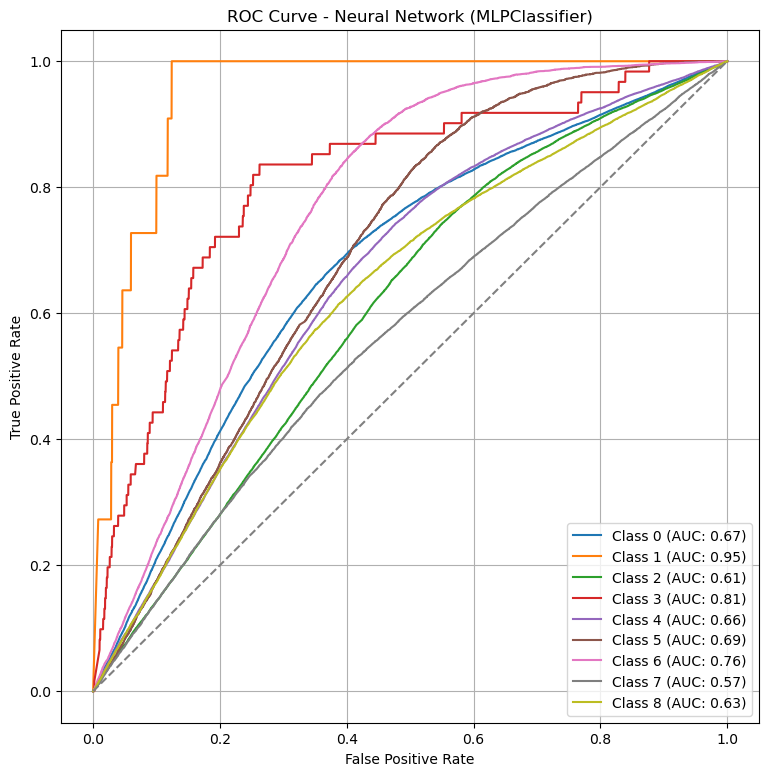

In [107]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

mlp_model.fit(X_train_scaled, y_train_filtered)

mlp_probs = mlp_model.predict_proba(X_test_scaled)

n_classes = y_test_filtered.shape[1]


plt.figure(figsize=(9, 9))
for idx in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_filtered[:, idx], mlp_probs[:, idx])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {idx} (AUC: {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network (MLPClassifier)')
plt.legend()
plt.grid(True)
plt.show()


# Performance Comparison

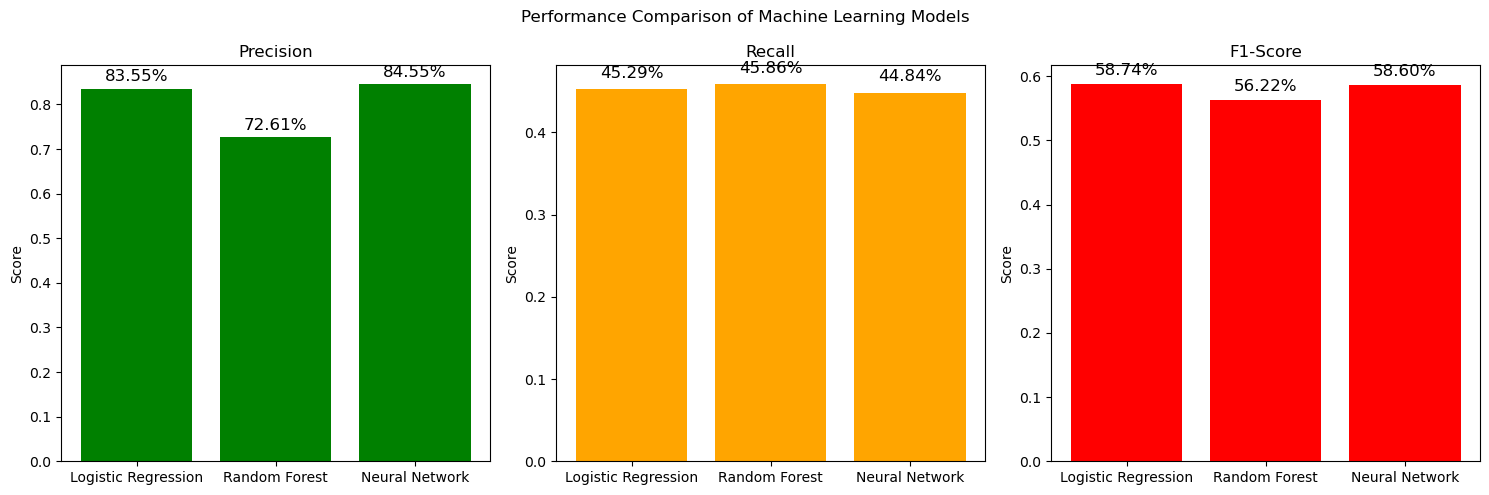

In [109]:

# Model Names
models = ['Logistic Regression', 'Random Forest', 'Neural Network']

# Performance Metrics
precision = [lr_precision, rf_precision, mlp_precision]
recall = [lr_recall, rf_recall, mlp_recall]
f1Score = [lr_f1, rf_f1, mlp_f1]

# Create Figure and Axes (1 Row, 3 Columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # ✅ Correct 1D array of axes
fig.suptitle('Performance Comparison of Machine Learning Models')

# Function to Annotate Bars
def annotate_bars(ax, data):
    for i, v in enumerate(data):
        ax.text(i, v + 0.01, f'{v:.2%}', ha='center', va='bottom', fontsize=12)

# Bar Plot for Precision
axs[0].bar(models, precision, color='green')
axs[0].set_title('Precision')
axs[0].set_ylabel('Score')
annotate_bars(axs[0], precision)

# Bar Plot for Recall
axs[1].bar(models, recall, color='orange')
axs[1].set_title('Recall')
axs[1].set_ylabel('Score')
annotate_bars(axs[1], recall)

# Bar Plot for F1-Score
axs[2].bar(models, f1Score, color='red')
axs[2].set_title('F1-Score')
axs[2].set_ylabel('Score')
annotate_bars(axs[2], f1Score)

plt.tight_layout()
plt.show()


# Testing

In [111]:
from collections import defaultdict

genre_to_songs = defaultdict(list)

for _, row in df1_filtered.iterrows():
    song = row['song']
    artist = row['artist']
    genres = row['genre_list']  # List of genres for that song

    if isinstance(genres, list):
        for genre in genres:
            genre_to_songs[genre.lower()].append((song, artist))


In [112]:
# Create label-to-song mapping from the classes
label_to_song = {i: label for i, label in enumerate(mlb.classes_)}

In [113]:
import pickle

# Save models
with open('mlp_model.pkl', 'wb') as f:
    pickle.dump(mlp_model, f)

with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save label mapping
with open('label_to_song.pkl', 'wb') as f:
    pickle.dump(label_to_song, f)

# Save vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

with open('genre_to_songs.pkl', 'wb') as f:
    pickle.dump(genre_to_songs, f)


In [114]:
# Load models
with open('mlp_model.pkl', 'rb') as f:
    mlp_model = pickle.load(f)

with open('lr_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)

with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)
    
# Load vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Load label mapping
with open('label_to_song.pkl', 'rb') as f:
    label_to_song = pickle.load(f)

# Load genre-to-songs dictionary
with open('genre_to_songs.pkl', 'rb') as f:
    genre_to_songs = pickle.load(f)

In [ ]:
# ===== USER MODEL SELECTION IMPLEMENTATION =====


def recommend_with_selected_model(caption_text, vectorizer, selected_model, model_name, 
                                 label_mapping, genre_to_songs, 
                                 threshold=0.2, top_k=3, top_genres=4):
    
    if not caption_text.strip():
        return "Please enter a valid caption."
    
    # Vectorize the caption
    caption_vector = vectorizer.transform([caption_text])
    
    try:
        # Get predictions from the selected model
        probs = selected_model.predict_proba(caption_vector)[0]
        
        # Show top genres from the model
        print(f"\nTop 5 genres from {model_name}:")
        genre_probs = [(label_mapping[i], prob) for i, prob in enumerate(probs)]
        genre_probs.sort(key=lambda x: x[1], reverse=True)
        for genre, prob in genre_probs[:5]:
            print(f"- {genre}: {prob*100:.2f}%")
        
        # Create pairs and sort
        genre_probs = [(i, prob) for i, prob in enumerate(probs)]
        genre_probs.sort(key=lambda x: x[1], reverse=True)
        
        # Get indices of genres above threshold
        predicted_indices = [i for i, prob in genre_probs if prob >= threshold]
        
        # Fallback: get top genres if threshold yields too few
        if len(predicted_indices) < top_genres:
            predicted_indices = [i for i, _ in genre_probs[:top_genres]]
        
        # Retrieve songs based on predicted genres
        recommended_songs = []
        seen_songs = set()  # To avoid duplicate songs
        
        for idx in predicted_indices:
            genre = label_mapping[idx]
            genre_prob = probs[idx]
            
            # Get songs for this genre
            songs = genre_to_songs.get(genre.lower(), [])
            
            # Limit songs per genre based on probability
            songs_to_add = min(max(1, int(top_k * genre_prob * 2)), top_k)
            
            added_count = 0
            for track, artist in songs:
                song_key = f"{track}|{artist}"
                if song_key not in seen_songs and added_count < songs_to_add:
                    confidence = f"{genre_prob*100:.1f}%"
                    recommended_songs.append(f" {track} by {artist} ({genre}, confidence: {confidence})")
                    seen_songs.add(song_key)
                    added_count += 1
                    
                if added_count >= songs_to_add:
                    break
        
        return "\n".join(recommended_songs) if recommended_songs else "No matching songs found."
    
    except Exception as e:
        return f"Error making predictions with {model_name}: {str(e)}"

# === USER INTERFACE FOR MODEL SELECTION ===
def user_model_selection():
    """
    Interactive function that lets the user select which model to use for recommendations.
    """
    print("\n=========================================")
    print(" Song Recommendation Model Selection ")
    print("=========================================")
    
    model_options = {
        '1': (mlp_model, "Neural Network"),
        '2': (lr_model, "Logistic Regression"),
        '3': (rf_model, "Random Forest")
    }
    
    while True:
        print("\nSelect a model to use for recommendations:")
        print("1. Neural Network")
        print("2. Logistic Regression")
        print("3. Random Forest")
        print("q. Quit")
        
        choice = input("\nEnter your choice (1-3, or q to quit): ").lower()
        
        if choice == 'q':
            print("Exiting model selection. Goodbye!")
            break
            
        if choice not in model_options:
            print("Invalid choice. Please select 1, 2, 3, or q.")
            continue
        
        # Get selected model and name
        selected_model, model_name = model_options[choice]
        print(f"\nSelected model: {model_name}")
        
        # Get caption
        user_caption = input("\nEnter your caption: ")
        
        # Get recommendations with selected model
        result = recommend_with_selected_model(
            user_caption,
            tfidf_vectorizer,
            selected_model,
            model_name,
            label_to_song,
            genre_to_songs,
            threshold=0.15  
        )
        
        print("\nRecommended Songs:")
        print(result)
        
        


def simple_model_selection():
    """
    A simplified version that just asks for model and caption once.
    """
    print("\n Song Recommendation Model Selection ")
    
    print("\nSelect a model to use for recommendations:")
    print("1. Neural Network")
    print("2. Logistic Regression")
    print("3. Random Forest")
    
    choice = input("\nEnter your choice (1-3): ")
    
    model_options = {
        '1': (mlp_model, "Neural Network"),
        '2': (lr_model, "Logistic Regression"),
        '3': (rf_model, "Random Forest")
    }
    
    if choice not in model_options:
        return "Invalid choice. Please select 1, 2, or 3."
    
    # Get selected model and name
    selected_model, model_name = model_options[choice]
    print(f"\nSelected model: {model_name}")
    
    # Get caption
    user_caption = input("\nEnter your caption: ")
    
    # Get recommendations with selected model
    result = recommend_with_selected_model(
        user_caption,
        tfidf_vectorizer,
        selected_model,
        model_name,
        label_to_song,
        genre_to_songs,
        threshold=0.15
    )
    
    print("\nRecommended Songs:")
    print(result)
    
    return "Recommendation complete"

user_model_selection()




 Song Recommendation Model Selection 

Select a model to use for recommendations:
1. Neural Network
2. Logistic Regression
3. Random Forest
q. Quit



Enter your choice (1-3, or q to quit):  1



Selected model: Neural Network



Enter your caption:  i am happy today



Top 5 genres from Neural Network:
- easy listening: 82.18%
- blues: 42.85%
- R&B: 32.48%
- Dance/Electronic: 15.71%
- hip hop: 12.74%

Recommended Songs:
 Sexbomb by Tom Jones (easy listening, confidence: 82.2%)
 Hey Baby (Radio Mix) by DJ Ötzi (easy listening, confidence: 82.2%)
 A Little Less Conversation - JXL Radio Edit Remix by Elvis Presley (easy listening, confidence: 82.2%)
 Maria Maria (feat. The Product G&B) by Santana (blues, confidence: 42.9%)
 Seven Nation Army by The White Stripes (blues, confidence: 42.9%)
 Thong Song by Sisqo (R&B, confidence: 32.5%)
 Lady - Hear Me Tonight by Modjo (Dance/Electronic, confidence: 15.7%)

Select a model to use for recommendations:
1. Neural Network
2. Logistic Regression
3. Random Forest
q. Quit



Enter your choice (1-3, or q to quit):  2



Selected model: Logistic Regression



Enter your caption:  i am happy today



Top 5 genres from Logistic Regression:
- Folk/Acoustic: 100.00%
- classical: 91.35%
- blues: 63.44%
- R&B: 59.56%
- easy listening: 45.59%

Recommended Songs:
 Sexbomb by Tom Jones (Folk/Acoustic, confidence: 100.0%)
 Go Let It Out by Oasis (Folk/Acoustic, confidence: 100.0%)
 Breathless by The Corrs (Folk/Acoustic, confidence: 100.0%)
 Way down We Go by KALEO (classical, confidence: 91.3%)
 Maria Maria (feat. The Product G&B) by Santana (blues, confidence: 63.4%)
 Seven Nation Army by The White Stripes (blues, confidence: 63.4%)
 Another Way to Die by Jack White (blues, confidence: 63.4%)
 Thong Song by Sisqo (R&B, confidence: 59.6%)
 Say My Name by Destiny's Child (R&B, confidence: 59.6%)
 Try Again by Aaliyah (R&B, confidence: 59.6%)
 Hey Baby (Radio Mix) by DJ Ötzi (easy listening, confidence: 45.6%)
 A Little Less Conversation - JXL Radio Edit Remix by Elvis Presley (easy listening, confidence: 45.6%)
 The Real Slim Shady by Eminem (hip hop, confidence: 34.9%)
 The Next Episode b


Enter your choice (1-3, or q to quit):  3



Selected model: Random Forest



Enter your caption:  i am happy today



Top 5 genres from Random Forest:
- easy listening: 80.69%
- blues: 48.11%
- R&B: 32.42%
- hip hop: 8.81%
- classical: 6.63%

Recommended Songs:
 Sexbomb by Tom Jones (easy listening, confidence: 80.7%)
 Hey Baby (Radio Mix) by DJ Ötzi (easy listening, confidence: 80.7%)
 A Little Less Conversation - JXL Radio Edit Remix by Elvis Presley (easy listening, confidence: 80.7%)
 Maria Maria (feat. The Product G&B) by Santana (blues, confidence: 48.1%)
 Seven Nation Army by The White Stripes (blues, confidence: 48.1%)
 Thong Song by Sisqo (R&B, confidence: 32.4%)
 The Real Slim Shady by Eminem (hip hop, confidence: 8.8%)

Select a model to use for recommendations:
1. Neural Network
2. Logistic Regression
3. Random Forest
q. Quit
